<a href="https://colab.research.google.com/github/daquarti/AI/blob/main/Fast_AI_Diabetes_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.menos de 48hs de evolución
drive.mount('/content/drive')

Mounted at /content/drive


# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [ ]:
from fastai.vision import *

In [ ]:
import pathlib
from shutil import copyfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
path = "/content/drive/My Drive/computer_vision/Diabetes/face_extraction"

In [ ]:
filepath = pathlib.Path (path)

In [ ]:
train = filepath / 'train'

In [ ]:
test = filepath / 'test' 

In [ ]:
np.random.seed(22)
data = ImageDataBunch.from_folder(str(filepath), train="train", valid = 'test', 
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [ ]:
data.classes

['diabetic', 'non_diabetic']

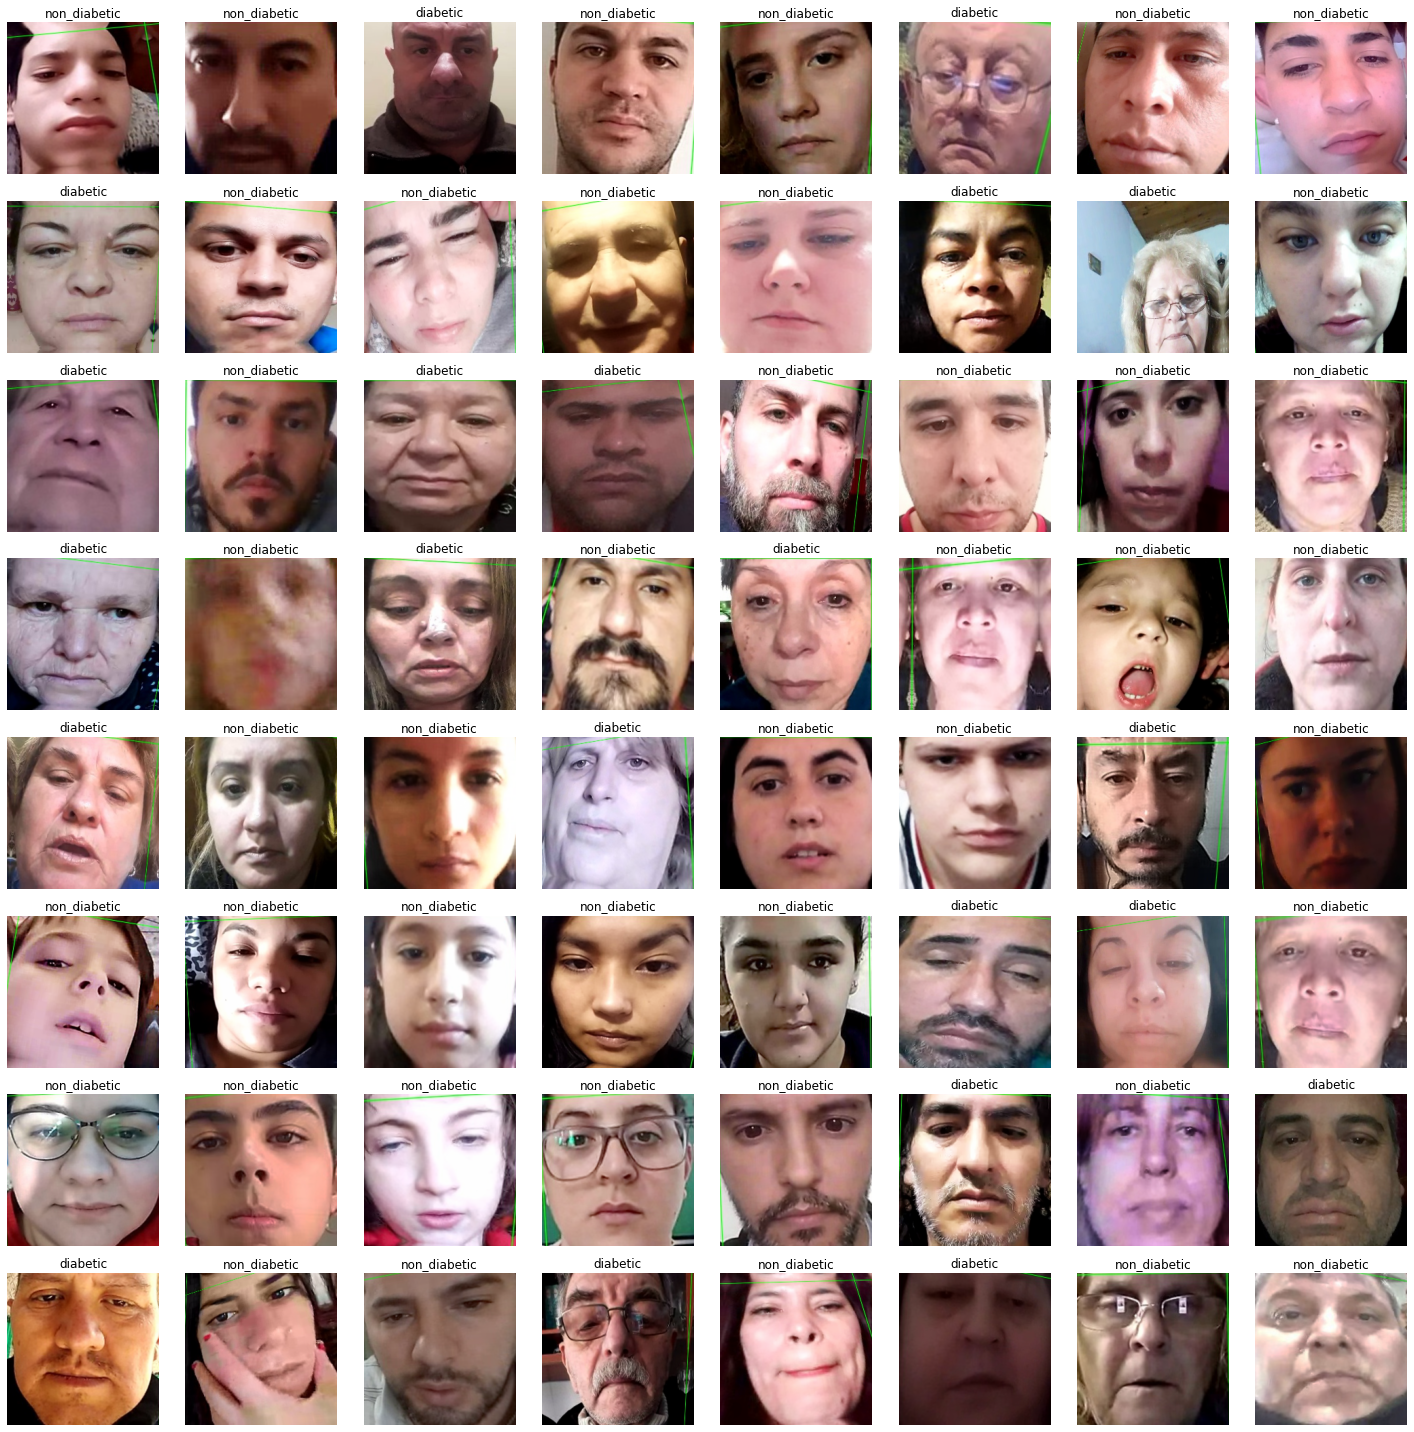

In [ ]:
data.show_batch(rows=10, figsize=(20,20))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['diabetic', 'non_diabetic'], 2, 9479, 2376)

## Train model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.711003,0.734887,0.332912,09:05
1,0.478408,0.694910,0.303030,01:44
2,0.401645,0.713018,0.304714,01:42


In [ ]:
learn.save(path + 'fast_diabetes-50')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


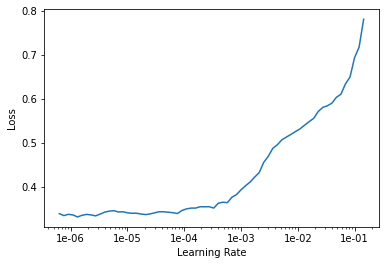

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.311924,0.784293,0.302189,01:57
1,0.209231,0.972614,0.330387,01:58
2,0.153160,1.103326,0.344697,01:58
3,0.095695,1.118548,0.299663,01:58
4,0.055080,1.317927,0.313552,01:58
5,0.045115,1.329559,0.297980,01:56
6,0.023718,1.401508,0.311869,01:57
7,0.013085,1.377579,0.293350,01:57
8,0.008582,1.393631,0.297980,01:57
9,0.005738,1.381735,0.302189,01:57


In [ ]:
learn.save(path + 'diabetes_resnet_50')

## Interpretation

In [ ]:
learn.load(path + 'diabetes_resnet_50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(4)

In [ ]:
interp.plot_confusion_matrix()